# Exploratory data analysis of the messages data

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick 
import matplotlib.dates as mdates
from matplotlib.ticker import PercentFormatter, FuncFormatter
%matplotlib inline

from sqlalchemy import create_engine, inspect
import sqlalchemy
import sqlite3
from cycler import cycler

import seaborn as sns
sns.set()

import regex as re
import nltk
from nltk import tokenize # word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk 
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import os 
# environment settings
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [23]:
os.getcwd()

'/Users/asyagadzhalova/Documents/GitHub/disaster_messages_classification/notebooks'

In [24]:
os.chdir('..')

In [25]:
#engine = sqlalchemy.create_engine('sqlite:///DisasterResponse.db')
df=pd.read_pickle(os.getcwd()+'/data/data.pkl')

In [5]:
df.head()

,id,message,original,genre,trans_ind,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(26180, 41)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26180 entries, 0 to 26179
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      26180 non-null  int64 
 1   message                 26180 non-null  object
 2   original                10153 non-null  object
 3   genre                   26180 non-null  object
 4   trans_ind               26180 non-null  int64 
 5   related                 26180 non-null  int64 
 6   request                 26180 non-null  int64 
 7   offer                   26180 non-null  int64 
 8   aid_related             26180 non-null  int64 
 9   medical_help            26180 non-null  int64 
 10  medical_products        26180 non-null  int64 
 11  search_and_rescue       26180 non-null  int64 
 12  security                26180 non-null  int64 
 13  military                26180 non-null  int64 
 14  child_alone             26180 non-null  int64 
 15  wa

In [8]:
df.drop(columns=['original'],axis=1,inplace=True)

In [9]:
df.describe(include='object')

,message,genre
count,26180,26180
unique,26177,3
top,#NAME?,news
freq,4,13039


In [10]:
df.describe()

,id,trans_ind,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,child_alone,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
count,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.0,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000,26180.000000
mean,15227.563942,0.386784,0.773568,0.170512,0.004507,0.414095,0.079488,0.050076,0.027655,0.017991,0.032811,0.0,0.063751,0.111421,0.088159,0.015432,0.023033,0.011383,0.033384,0.045531,0.131436,0.065126,0.045798,0.050840,0.020321,0.006073,0.010810,0.004584,0.011803,0.043965,0.278304,0.082086,0.093201,0.010772,0.093659,0.020168,0.052559,0.193430
std,8827.269301,0.487023,0.435351,0.376089,0.066986,0.492574,0.270504,0.218107,0.163985,0.132920,0.178146,0.0,0.244313,0.314659,0.283531,0.123264,0.150011,0.106083,0.179641,0.208470,0.337883,0.246753,0.209051,0.219676,0.141098,0.077696,0.103409,0.067549,0.108000,0.205021,0.448172,0.274500,0.290719,0.103228,0.291360,0.140578,0.223156,0.394995
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7449.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15665.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22927.250000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30265.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['child_alone'].value_counts()

0    26180
Name: child_alone, dtype: int64

### Check for duplicated categories or constant categories

In [12]:
#find columns with the same value
col_list = []
for col in df.columns:
    if df[col].nunique()==1:
        col_list.append(col)

In [13]:
col_list

['child_alone']

In [14]:
#drop the category with only 0 values -> indicating there was not a message for child alone
df.drop(['child_alone'],axis=1,inplace=True)

In [15]:
#find columns that have 2 variables - all columns w/o messages should have 2 values
col_list2 = []
for col in df.columns:
    if df[col].nunique()==2:
        col_list2.append(col)

set(df.columns) - set(col_list2) #expect only messages, id and genre columns

{'genre', 'id', 'message', 'related'}

In [16]:
#related column has 3 values instead of 2
df['related'].value_counts()

1    19876
0     6116
2      188
Name: related, dtype: int64

In [ ]:
df.loc[df['related']==2,'related']=1

Column Related - it has 3 values, instead of 2. The target variables should be binary, so we will mark the ones with 2 as value 1

In [17]:
pd.set_option('display.max_colwidth', None)
df[df['related']==0].head()

,id,message,genre,trans_ind,related,request,offer,aid_related,medical_help,medical_products,search_and_rescue,security,military,water,food,shelter,clothing,money,missing_people,refugees,death,other_aid,infrastructure_related,transport,buildings,electricity,tools,hospitals,shops,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
5,14,Information about the National Palace-,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,17,"I would like to receive the messages, thank you",direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,21,I am in Petionville. I need more information regarding 4636,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,28,are you going to call me or do you want me to call ou? let me know?,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18,30,I don't understand how to use this thing 4636.,direct,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df.columns

Index(['id', 'message', 'genre', 'trans_ind', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [19]:
col_sum = ['related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'water', 'food', 'shelter', 'clothing', 'money',
       'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report']

In [20]:
df['related'][1]

1

In [21]:
len(df)

26180

#### Rows with all 0 categories
Those are actually the rows that represent the category - Not related. It is omitted, which is ok for classifiers like SVC&LogRegression, but if we use Tree methods, we will have to add it as additional column

In [22]:
list_rows_0 = []

for row in range(0,len(df)):
    k=0
    for col in col_sum:
        k +=df[col][row]
    if k == 0:
        list_rows_0.append(row)

In [23]:
#Number of rows without any category definition
len(list_rows_0)

6116

In [24]:
#list_rows_0

In [25]:
df.iloc[5]

id                                                            14
message                   Information about the National Palace-
genre                                                     direct
trans_ind                                                      1
related                                                        0
request                                                        0
offer                                                          0
aid_related                                                    0
medical_help                                                   0
medical_products                                               0
search_and_rescue                                              0
security                                                       0
military                                                       0
water                                                          0
food                                                           0
shelter                  

So there are 6116 rows that indicate no relevant information about the disaster - this is also indicated by column Related = 0. __We have imbalanced dataset__

### Categories distribution

In [28]:
df.columns.values

array(['id', 'message', 'genre', 'trans_ind', 'related', 'request',
       'offer', 'aid_related', 'medical_help', 'medical_products',
       'search_and_rescue', 'security', 'military', 'water', 'food',
       'shelter', 'clothing', 'money', 'missing_people', 'refugees',
       'death', 'other_aid', 'infrastructure_related', 'transport',
       'buildings', 'electricity', 'tools', 'hospitals', 'shops',
       'aid_centers', 'other_infrastructure', 'weather_related', 'floods',
       'storm', 'fire', 'earthquake', 'cold', 'other_weather',
       'direct_report'], dtype=object)

In [31]:
df.iloc[1,4:]

related                   1
request                   0
offer                     0
aid_related               1
medical_help              0
medical_products          0
search_and_rescue         0
security                  0
military                  0
water                     0
food                      0
shelter                   0
clothing                  0
money                     0
missing_people            0
refugees                  0
death                     0
other_aid                 1
infrastructure_related    0
transport                 0
buildings                 0
electricity               0
tools                     0
hospitals                 0
shops                     0
aid_centers               0
other_infrastructure      0
weather_related           1
floods                    0
storm                     1
fire                      0
earthquake                0
cold                      0
other_weather             0
direct_report             0
Name: 1, dtype: obje

Text(0.5, 0, 'Category')

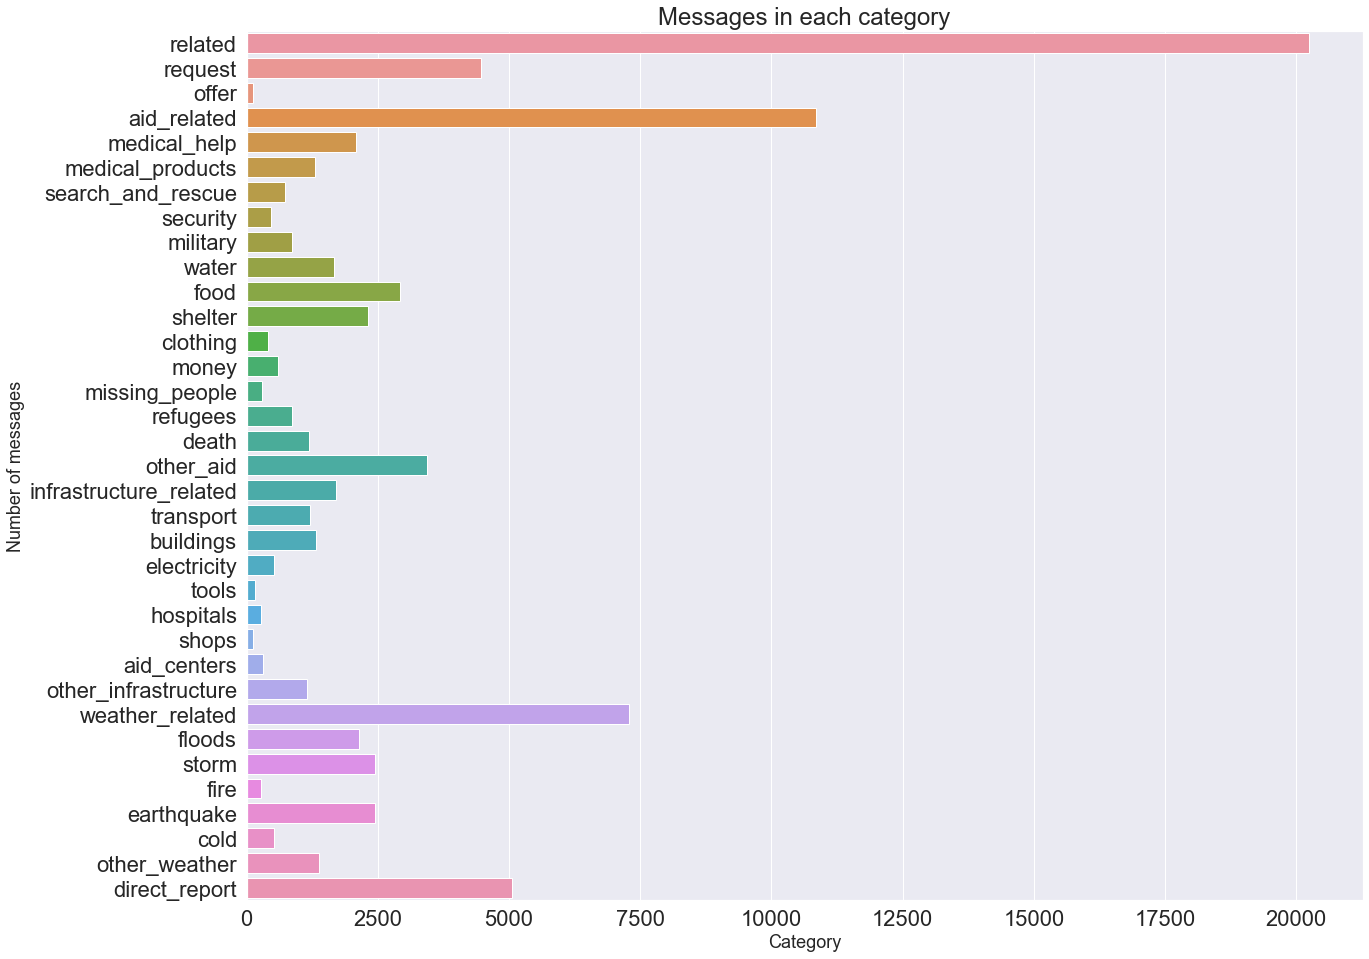

In [53]:
categories = col_sum
sns.set(font_scale = 2)
plt.figure(figsize=(20,16))

ax= sns.barplot(y = col_sum, x = df.iloc[:,4:].sum().values, orient='h')
plt.title("Messages in each category", fontsize=24)
plt.ylabel('Number of messages', fontsize=18)
plt.xlabel('Category', fontsize=18)
#plt.xticks(rotation=90);

In [54]:
rowSums = df.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()

In [58]:
multiLabel_counts.iloc[1:]

1     5115
3     3603
5     2950
4     2273
6     1900
7     1344
8      878
2      631
9      576
10     344
11     183
12     107
13      57
14      38
15      20
17      12
16       8
18       7
19       5
20       4
21       4
22       2
27       2
24       1
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


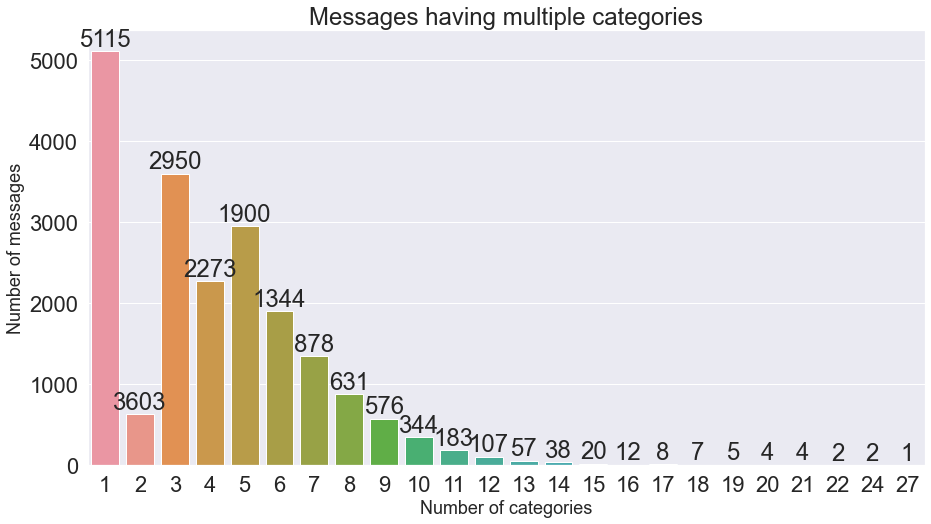

In [65]:
rowSums = df.iloc[:,4:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

plt.figure(figsize=(15,8))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Messages having multiple categories")
plt.ylabel('Number of messages', fontsize=18)
plt.xlabel('Number of categories', fontsize=18)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

In [63]:
rowSums[rowSums==24].index

Int64Index([24895], dtype='int64')

In [68]:
#how many messages have only Related category, and no other category?
list_1_category = rowSums[rowSums==1].index.to_list()

In [71]:
df.iloc[list_1_category]['related'].sum()

5115

All messages with 1 category are marked as Related category -> everything that cannot be classified into the other, is Related. Since Related ==0 is for 6116 rows, the number of rows with empty data, it means that for the other rows with more than 1 category, always one of the categories is Related.<br>
Hence, once the message is received, it is either clasified as:

- in more than 1 category, with one of them being Related;
- only as Related;
- or as no category

In [73]:

df.to_pickle(os.getcwd()+'/data/data_after_eda.pkl')